# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000,6,8650,0,1,220,18.0,0,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650,6,4000,0,1,137,97.0,1,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126,12,4000,0,1,251,84.0,0,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8491,82",6,5000,0,0,36,168.0,1,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990,12,4000,0,1,83,101.0,1,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Два и более высших образования', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Энергетика', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'ЧОП/Детективная д-ть', 'Государственная служба', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Недвижимость', 'Сельское хозяйство', 'Металлургия/Промышленность/Машиностроение', 'Туризм', 'Сборочные производства', 'Маркетинг', 'Салоны красоты и здоровья', 'Торговля', 'Другие сферы', 'Страхование', 'Информационные технологии', 'Нефтегазовая промышленность', 'Химия/Парфюмерия/Фармацевтика', 'Информационные услуги', 'Образование', 'Банк/Финансы', 'Здравоохранение', 'Наука', 'Подбор персонала', 'Развлечения/Искусство', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
missing = df.isnull().sum()
print('Признаки с пропусками и их количество:')
missing[missing > 0]

Признаки с пропусками и их количество:


GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
TP_PROVINCE                     590
REGION_NM                         2
WORK_TIME                      2717
PREVIOUS_CARD_NUM_UTILIZED    29533
dtype: int64

Для категориальных переменных мы можем отнести пропуски в отдельную категорию или заполнить самым частым значением для признака. 
Если пропусков не очень много - можно вручную посмотреть и убрать такие наблюдения их выборки.
Для числовых - значение можно изменить на 0 или на среднее по всему признаку.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
df.select_dtypes('object').head()

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,CREDIT,FST_PAYMENT,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,sample
0,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,"3016,8","335,2",0,0,test
1,Среднее,Состою в браке,NaN,NaN,NaN,NaN,NaN,от 10000 до 20000 руб.,4100,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,6000,2000,0,0,test
2,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,40000,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,10000,2490,0,0,test
3,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,20000,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,5175,575,0,0,test
4,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,17000,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,13065,10000,0,0,test


Все признаки выше, кроме PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT.

Все категориальные признаки необходимо преобразовать через Label Encoding или Dummy/One-hot Encoding.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    
    # Drop AGREEMENT_RK from data frame
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # Replace commas with dots and convert columns to float
    cols = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for col in cols:
        df_output[col] = df_output[col].apply(lambda x: x.replace(',', '.')).astype('float')
    
    # Filling missing values
    cols_with_nan = df_output.isnull().sum()[df_output.isnull().sum() > 0].index.tolist()
    object_cols = df_output[cols_with_nan].select_dtypes(include='object').columns.tolist()
    num_cols = df_output[cols_with_nan].select_dtypes(exclude='object').columns.tolist()
    for col in object_cols:
        if df_output[col].nunique() <= 3:
            df_output[col].fillna(0, inplace=True)
        else:
            df_output[col].fillna(df_output[col].value_counts().index[0], inplace=True)

    for col in num_cols:
        if df_output[col].nunique() <= 3:
            df_output[col].fillna(0, inplace=True)
        else:
            df_output[col].fillna(df_output[col].mean(), inplace=True) 
    
    #Encoding categorical variables
    cat_cols = df_output.select_dtypes(include='object').columns.tolist()[:-1]
    df_output = pd.get_dummies(df_output, columns=cat_cols, drop_first=True)
    
    return df_output

In [18]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
X_test = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict_proba(X_valid)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict_proba(X_valid)

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_valid)

In [22]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier metrics:')
print('precision: ', precision_score(y_valid, tree_pred[:, 1]))
print('recall: ', recall_score(y_valid, tree_pred[:, 1]))
print('accuracy: ', accuracy_score(y_valid, tree_pred[:, 1]))
print('='*30)

print('RandomForestClassifier metrics:')
print('precision: ', precision_score(y_valid, forest_pred[:, 1].round()))
print('recall: ', recall_score(y_valid, forest_pred[:, 1].round()))
print('accuracy: ', accuracy_score(y_valid, forest_pred[:, 1].round()))
print('='*30)

print('LogisticRegression metrics:')
print('precision: ', precision_score(y_valid, logit_pred[:, 1].round()))
print('recall: ', recall_score(y_valid, logit_pred[:, 1].round()))
print('accuracy: ', accuracy_score(y_valid, logit_pred[:, 1].round()))

DecisionTreeClassifier metrics:
precision:  0.16755793226381463
recall:  0.16936936936936936
accuracy:  0.7968031530545215
RandomForestClassifier metrics:
precision:  0.25
recall:  0.0036036036036036037
accuracy:  0.8776001751696957
LogisticRegression metrics:
precision:  0.2857142857142857
recall:  0.0036036036036036037
accuracy:  0.877819137289249


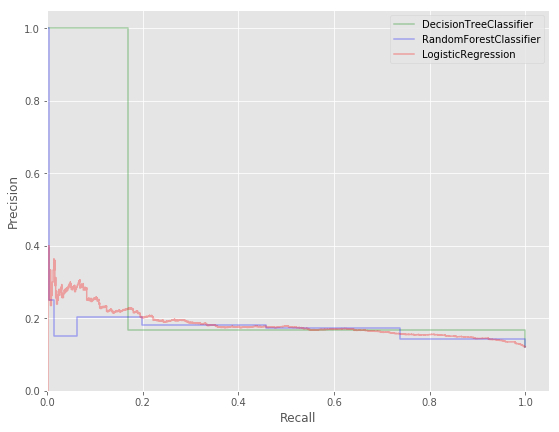

In [23]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
from sklearn.metrics import precision_recall_curve
import seaborn as sns

## Your Code Here
tree_precision, tree_recall, _ = precision_recall_curve(y_valid, tree_pred[:, 1]);
forest_precision, forest_recall, _ = precision_recall_curve(y_valid, forest_pred[:, 1]);
logit_precision, logit_recall, _ = precision_recall_curve(y_valid, logit_pred[:, 1]);

plt.figure(figsize=(9, 7));
plt.step(tree_recall, tree_precision, color='g', alpha=0.3, label='DecisionTreeClassifier');
plt.step(forest_recall, forest_precision, color='b', alpha=0.3, label='RandomForestClassifier');
plt.step(logit_recall, logit_precision, color='r', alpha=0.3, label='LogisticRegression');

plt.xlabel('Recall');
plt.ylabel('Precision');
plt.ylim([0.0, 1.05]);
plt.xlim([0.0, 1.05]);
plt.legend();

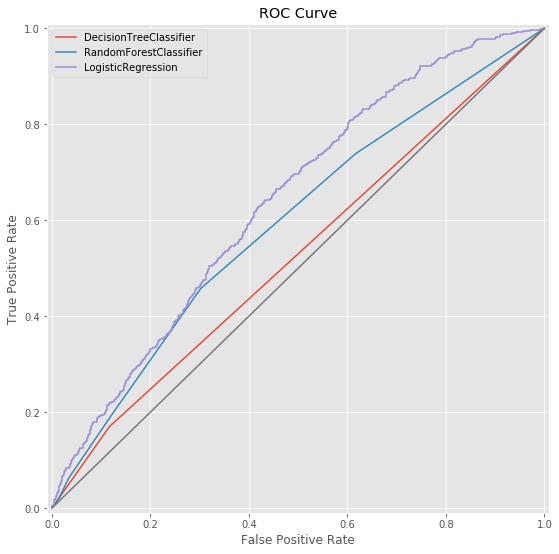

In [24]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr1, tpr1, thresholds = roc_curve(y_valid, tree_pred[:, 1])
fpr2, tpr2, thresholds = roc_curve(y_valid, forest_pred[:, 1])
fpr3, tpr3, thresholds = roc_curve(y_valid, logit_pred[:, 1])

plt.figure(figsize=(9, 9))
plt.plot(fpr1, tpr1, label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2, label='RandomForestClassifier')
plt.plot(fpr3, tpr3, label='LogisticRegression')
plt.plot([0, 1], [0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend();

In [25]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
print('DecisionTreeClassifier: {:.4f}'.format(cross_val_score(tree, X_train, y_train, scoring='roc_auc', cv=10).mean()))
print('RandomForestClassifier: {:.4f}'.format(cross_val_score(forest, X_train, y_train, scoring='roc_auc', cv=10).mean()))
print('LogisticRegression: {:.4f}'.format(cross_val_score(logit, X_train, y_train, scoring='roc_auc', cv=10).mean()))

DecisionTreeClassifier: 0.5277
RandomForestClassifier: 0.5805
LogisticRegression: 0.6265


In [26]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = logit.predict_proba(X_test)
## Your Code Here

0.6228840208423795


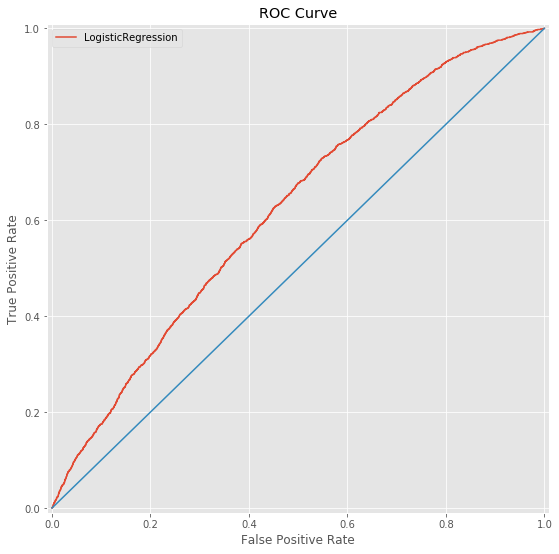

In [27]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
roc_auc = roc_auc_score(y_test, predict[:, 1])

## Your Code Here
fpr, tpr, thresholds = roc_curve(y_test, predict[:, 1])

plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, label='LogisticRegression')
plt.plot([0, 1], [0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend();
print(roc_auc)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [28]:
### И далее ;)